<h3>Serov Alexander BS-81</h3>
<h4>ROC-анализ</h4>

In [32]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [33]:
np.random.seed()
data = np.random.randint(10,101, size=100)
data.sort()

data

array([10, 13, 13, 14, 15, 15, 15, 16, 17, 18, 19, 20, 20, 22, 23, 23, 24,
       25, 28, 28, 28, 29, 30, 31, 31, 31, 32, 33, 36, 36, 37, 38, 39, 39,
       39, 41, 43, 44, 46, 46, 48, 48, 49, 50, 53, 53, 55, 56, 56, 57, 58,
       58, 58, 58, 59, 59, 59, 60, 62, 62, 63, 64, 65, 66, 67, 68, 69, 71,
       72, 72, 73, 74, 74, 75, 76, 77, 77, 78, 79, 80, 81, 81, 82, 84, 84,
       87, 88, 91, 91, 92, 92, 92, 92, 94, 95, 95, 95, 97, 98, 98])

In [34]:
data2 = data.copy()
for x in range(100):
    if data2[x] <= 40:
        data2[x] = 0
    elif data2[x] >= 60:
        data2[x] = 1
    else:
        data2[x] = random.choice([0,1])

data2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
table = None

def get_Se_Sp(data, binary, threshold):
    table = []
    for x in data:
        bool_mask = data >= x
        lenth = len(bool_mask)
        
        TP = len([1 for i in range(lenth) if binary[i] == bool_mask[i] == 1])
        TN = len([1 for i in range(lenth) if binary[i] == bool_mask[i] == 0])
        FN = len([1 for i in range(lenth) if binary[i] == 1 and bool_mask[i] == 0])
        FP = len([1 for i in range(lenth) if binary[i] == 0 and bool_mask[i] == 1])
   
        Se = TP / (TP + FN) * 100
        Sp = TN / (TN + FP) * 100

        print(Se, Sp)
        table.append([x, Se, Sp])

    table = np.asarray(table)
    df = pd.DataFrame(table, columns =['Point', 'Sensitivity', 'Specificity'])
    return table, df
    

In [36]:
table, datafr = get_Se_Sp(data, data2, 40)


100.0 0.0
100.0 2.083333333333333
100.0 2.083333333333333
100.0 6.25
100.0 8.333333333333332
100.0 8.333333333333332
100.0 8.333333333333332
100.0 14.583333333333334
100.0 16.666666666666664
100.0 18.75
100.0 20.833333333333336
100.0 22.916666666666664
100.0 22.916666666666664
100.0 27.083333333333332
100.0 29.166666666666668
100.0 29.166666666666668
100.0 33.33333333333333
100.0 35.41666666666667
100.0 37.5
100.0 37.5
100.0 37.5
100.0 43.75
100.0 45.83333333333333
100.0 47.91666666666667
100.0 47.91666666666667
100.0 47.91666666666667
100.0 54.166666666666664
100.0 56.25
100.0 58.333333333333336
100.0 58.333333333333336
100.0 62.5
100.0 64.58333333333334
100.0 66.66666666666666
100.0 66.66666666666666
100.0 66.66666666666666
100.0 72.91666666666666
98.07692307692307 72.91666666666666
96.15384615384616 72.91666666666666
96.15384615384616 75.0
96.15384615384616 75.0
96.15384615384616 79.16666666666666
96.15384615384616 79.16666666666666
96.15384615384616 83.33333333333334
96.15384615384

In [37]:
datafr

,Point,Sensitivity,Specificity
0,10.0,100.000000,0.000000
1,13.0,100.000000,2.083333
2,13.0,100.000000,2.083333
3,14.0,100.000000,6.250000
4,15.0,100.000000,8.333333
...,...,...,...
95,95.0,11.538462,100.000000
96,95.0,11.538462,100.000000
97,97.0,5.769231,100.000000
98,98.0,3.846154,100.000000


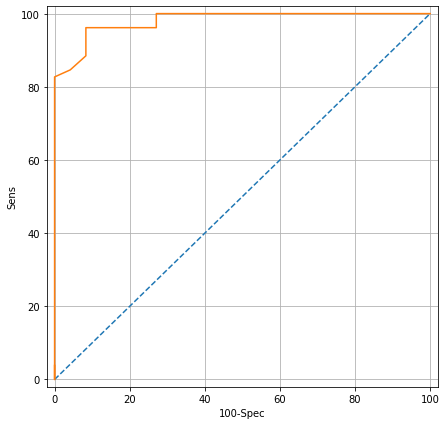

In [38]:
def plot_table(data):
        fig = plt.figure(figsize=(7,7))
        ax = fig.add_subplot(111)
        ax.set_ylim((-2, 102))
        ax.set_xlim((-2, 102)) 

        ax.plot(np.arange(101), np.arange(101), '--')
        ax.grid()

        x = 100 - data[:,2] 

        y = data[:,1]      
        x = np.insert(x, -1, 0)
        y = np.insert(y, -1, 0)
        ax.plot(x, y)
        ax.set_ylabel('Sens')
        ax.set_xlabel('100-Spec')
            
plot_table(table)

In [39]:
def maxSESP_method(data, treshold):
    # sensivity > threshold %
    data_above_treshold = filter(lambda x: x[1]>treshold, table) 
    # max specifity from the data_above_treshold 
    return max(data_above_treshold, key=lambda x: x[2])

In [40]:
def sumSESP_method(data):
    return max(data, key=lambda x: (x[1]+x[2]))

In [41]:
def balans_method(data):
    return min(data, key=lambda x: abs(x[1]-x[2]))

In [42]:
opt_treshold = {"First_method":maxSESP_method(table, 80),"Second_method":sumSESP_method(table),"Third_method":balans_method(table)}

opt_treshold

{'First_method': array([ 60.        ,  82.69230769, 100.        ]),
 'Second_method': array([55.        , 96.15384615, 91.66666667]),
 'Third_method': array([57.        , 90.38461538, 91.66666667])}

In [43]:
def AUC(data):
    sumI = 0
    x = 100 - data[:,2]
    y = data[:,1]
    for i in range(len(x)-1):
        sumI +=(x[i]-x[i+1]) * y[i:i+2].mean()
    return sumI / 10000 

AUC(table)

0.9803685897435899

<h4>Вывод</h4>

ROC-анализ является одним из самых простых методов бинарной классификации.
В данном примере мы убедились что с его помощью можно выявить оптимальный порог отсекания данных 3-мя разными алгоритмами, которые базируются на значениях специфичности и чувствительности.

В нашем случае мы полусили отличную модель со значением AUC 0.98 и хорошим изгибом графика.